## TensorFlow - Graphs, Sessions and the Tensors


- *Graph* represents the data flow of computations
- *Session* executes the operations in a graph
- When you create a graph, you are not bound to run the whole graph, but control parts of the graph you want to compute
- **Tensor** is a multidimensional array

In [39]:
import numpy as np
import tensorflow as tf

#### Graphs

A computational graph is a series of TF operations arranged into a graph of nodes. 

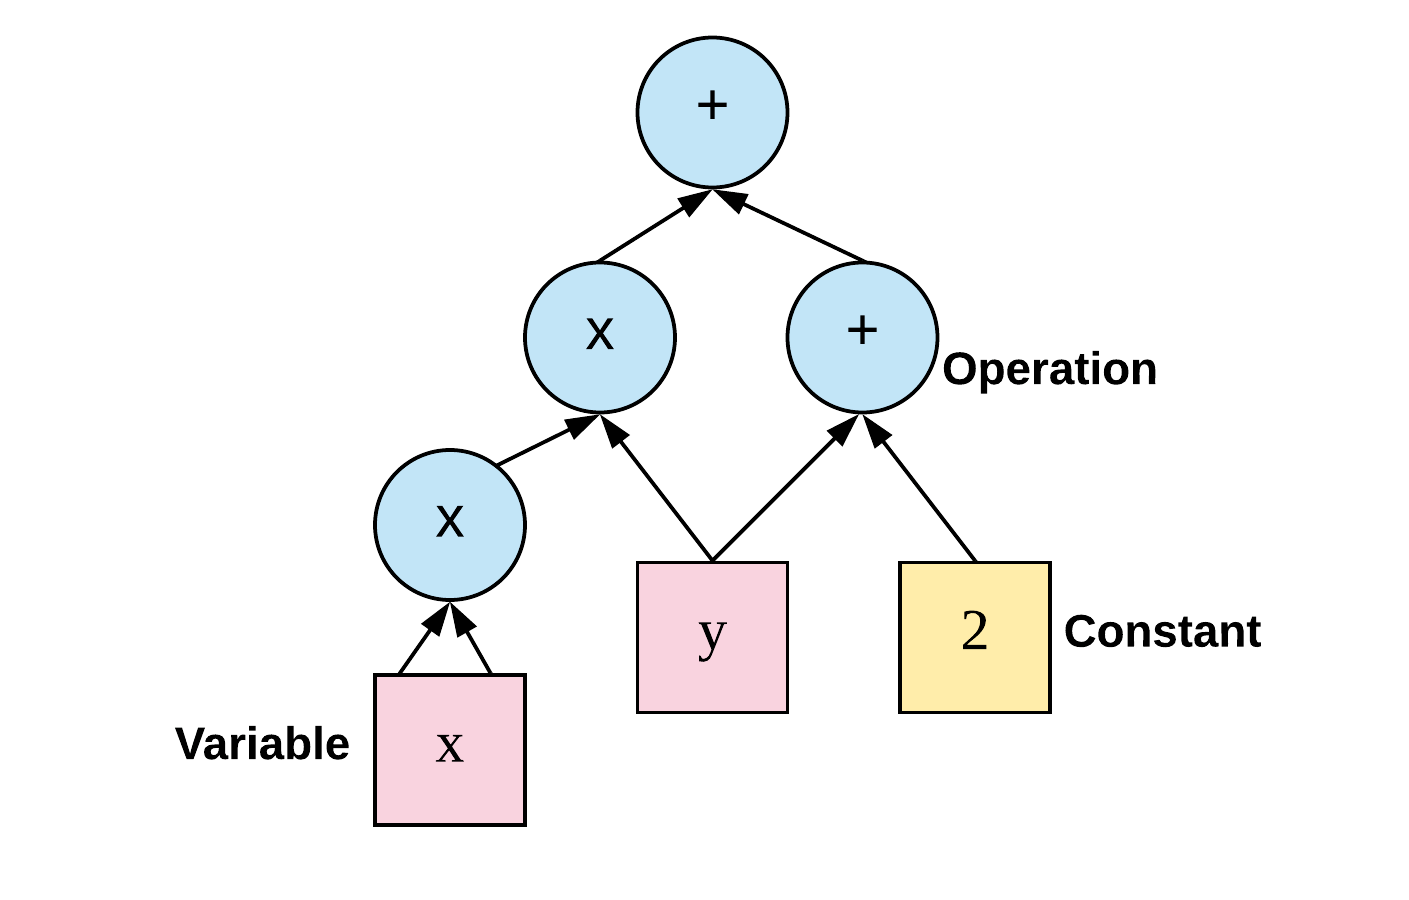


In [40]:
a = 2
b = 3
c = tf.add(a,b,name='Add')
print(c)

Tensor("Add_13:0", shape=(), dtype=int32)


## Session

- Two input nodes
- One output node called 'Add'
- this step creates the nodes and the nodes are evaluated only after a Session
- TF doesnt execute the graph unless it is specified to do so in a session


- Launch a graph in a **Session**
- create a Session object and then invoke run method t run enough of the graph to evaluate c

- Here, we can see that tensorflow does only the required amount of computation. 
- The useless operation only requires the addition and x. So only addition is done
- The power requires addition and multiply so both are done

In [41]:
sess= tf.Session()
print(sess.run(c))
sess.close()

5


In [42]:
x = 2
y = 3
add_op = tf.add(x,y, name='Add')
mul_op = tf.multiply(x,y, name = 'Multiply')
pow_op = tf.pow(add_op,mul_op,name = 'Power')
useless_op = tf.multiply(x,add_op, name='Useless')


In [43]:
sess=tf.Session()
print(sess.run(useless_op))
sess.close()

10


## Tensor Types

- TF uses a tensor data structure to represent the data- only tensors are passed between operations in the computation graph.
- Tensor types are: Constant, Variable and Placeholder.
- Concept of python name and tf name.


#### Constants: 

In [44]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.add(a,b,name='Add')
d = a+b
print(c)
print(d)
with tf.Session() as sess:
    print(sess.run(c))
    print(sess.run(d))
    

Tensor("Add_15:0", shape=(), dtype=int32)
Tensor("add_16:0", shape=(), dtype=int32)
5
5


#### Variables

    w = tf.Variable(<initial-value>, name = <optional_name>)
   
 - Calling tf.Variable is the old way of creating a variable. The new way is to use wrapper tf.get_variable as it accepts the name, shape, etc as its arguments: 

In [45]:
W = tf.Variable(tf.zeros([784,100]))

**Initialize Variables** 

We invoke a variable initializer operation on the session and run the operation on the session. This is easiest way to initialize all variables all at once


 - Weights are initialized from a normal distribution using tf.truncated_normal_initializer()
 - Biases are initialized from zeros using tf.zeros_initializer()
 
 

In [49]:
a1 = tf.get_variable(name="var105", initializer=tf.constant(2))
b1 = tf.get_variable(name="var106", initializer=tf.constant(5))
c1 = tf.add(a,b,name="var107")

init_op = tf.global_variables_initializer() # Op to initialize global variables

In [51]:
with tf.Session() as sess:
    sess.run(init_op)
    print(sess.run(a1))
    print(sess.run(b1))
    print(sess.run(c1))

2
5
5


In [52]:
weights = tf.get_variable(name = "W", shape= [2,3], initializer=tf.truncated_normal_initializer(stddev=0.01))
biases = tf.get_variable(name = "b", shape = [3], initializer=tf.zeros_initializer())

init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    W,b = sess.run([weights, biases])
    print(W)

[[ 0.00046819 -0.00072205 -0.0002102 ]
 [ 0.00528897  0.01392139  0.00997282]]


## Placeholders

- More basic than a variable
- Simple a variable that we assign a data in the future
- Nodes whose values are fed at execution time
- If we have inputs to our network that depend on some external data and we don't want our graph to depend on any real value while developing the graph, placeholders are the datatype we need
- They only need datatype
- They need tensorshape so that the graph still knows what to compute with even though it doesnt have any stored values yet.

In [63]:
a = tf.constant([5, 5, 5], tf.float32, name='A')
b = tf.placeholder(tf.float32, shape=[3], name='B')
c = tf.add(a, b, name="Add")

with tf.Session() as sess:
    # create a dictionary:
    d = {b: [1, 2, 3]}
    # feed it to the placeholder
    print(sess.run(c, feed_dict=d))



[6. 7. 8.]


### Creating an ANN:


One hidden layer and 200 hidden units.
The computational graph:

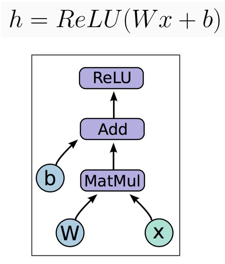


**Approach:** Feed all inputs and train the trainable parameters by backpropagating error signals. Ideally, we need to feed all inputs together, update parameters after calculating error - *Gradient Descent*

**Inputs:** Generally use Placeholders, so that we can build the graph without real value in context. Choose proper size, though. 

**Weights:**  In TF, gradient updates will be applied, so they have to be declared as variables. 

**Biases:** Biases are dimensions of next layer

**MatMul:** between x  and w

**Add:** between xw and b

**ReLU:** on xw+b

In [69]:
import tensorflow as tf
import numpy as np


In [71]:

X = tf.placeholder(tf.float32, shape=[None,784], name="X1")

weight_inter = tf.truncated_normal_initializer(mean=0.0,stddev=0.01)
W = tf.get_variable(name = "Weight1", dtype = tf.float32, shape=[784,200], initializer=weight_inter)

bias_inter = tf.constant(0.,shape=[200],dtype=tf.float32)
b = tf.get_variable(name="Bias1", dtype=tf.float32, initializer=bias_inter)
x_w = tf.matmul(X,W,name="MatMul1")
x_w_b = tf.add(x_w,b, name="Add1")
h = tf.nn.relu(x_w_b, name="ReLU1")

In [79]:
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init_op)
    d = {X:np.random.rand(100,784)}
    Ht = sess.run(h,feed_dict=d)
    bt = sess.run(x_w_b, feed_dict=d)


In [80]:
np.shape(bt)

(100, 200)

In [81]:
bt[0,:]

array([ 0.05794734,  0.16472544,  0.05415388,  0.00402495, -0.10224523,
        0.10153908,  0.25752974, -0.0544434 ,  0.07636391,  0.04318675,
        0.11425731, -0.12543862, -0.0076455 , -0.04172558,  0.02347071,
        0.03434096, -0.11256245, -0.31162453,  0.11628093,  0.10756524,
        0.0725925 , -0.15531874, -0.05452662, -0.34698287,  0.02728585,
        0.05008626, -0.16450341, -0.1071702 ,  0.13885938,  0.10745116,
       -0.2640099 , -0.17478557, -0.01811754, -0.19108783,  0.12551491,
       -0.09670293, -0.03776743, -0.08264306, -0.1419175 ,  0.01635194,
       -0.22581524, -0.26020217, -0.06855827, -0.05220783, -0.04605282,
       -0.1281173 , -0.01540273, -0.11305524,  0.11715803,  0.04306311,
        0.12321457, -0.08158278, -0.01389935,  0.2550704 , -0.02928559,
        0.01194115, -0.1510277 ,  0.11323367, -0.06609909,  0.20862612,
        0.3094967 , -0.21138029,  0.11582415,  0.0785539 ,  0.09247827,
        0.09975795, -0.04942133, -0.04865674, -0.04050253, -0.05